In [3]:
# 05_nlp_analysis.ipynb
import pandas as pd
import re
from collections import Counter
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import nltk

In [4]:
# NLTK stopwords
df = pd.read_csv('../data/customer_behavior_clean.csv')
stop_words = set(stopwords.words('english'))

In [5]:
# Clean reviews
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'[^a-z\s]', ' ', text)
    words = [w for w in text.split() if w not in stop_words]
    return " ".join(words)

df['clean_review'] = df['review_text'].apply(clean_text)

# Top 15 words
all_words = [w for review in df['clean_review'] for w in review.split()]
Counter(all_words).most_common(15)

[('product', 63),
 ('quality', 52),
 ('terrible', 38),
 ('service', 38),
 ('happy', 38),
 ('fast', 35),
 ('delivery', 35),
 ('good', 35),
 ('packaging', 35),
 ('highly', 33),
 ('recommend', 33),
 ('okay', 30),
 ('could', 30),
 ('better', 30),
 ('loved', 30)]

In [10]:
# Simple sentiment
positive_words = set("great satisfied loved fast good recommend exceeded happy".split())
negative_words = set("terrible expensive unhelpful not unhappy bad worse worst".split())

def get_sentiment(text):
    words = text.split()
    pos = sum(w in positive_words for w in words)
    neg = sum(w in negative_words for w in words)
    if pos > neg:
        return 'positive'
    elif neg > pos:
        return 'negative'
    else:
        return 'neutral'

df['sentiment'] = df['clean_review'].apply(get_sentiment)
df['sentiment'].value_counts()

sentiment
positive    155
neutral      95
negative     50
Name: count, dtype: int64

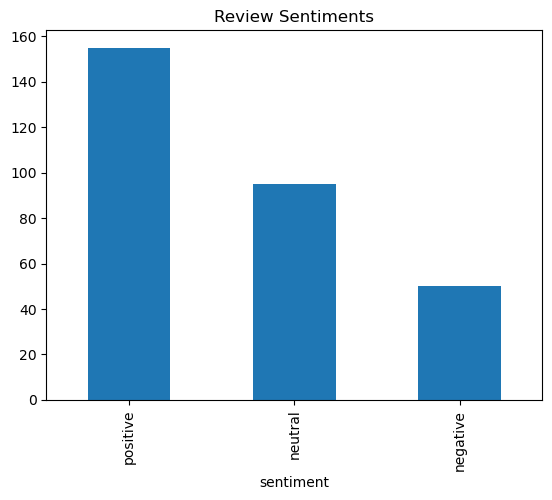

In [8]:
# Bar chart of sentiments
df['sentiment'].value_counts().plot(kind='bar')
plt.title("Review Sentiments")
plt.show()

In [9]:
# 5. Example reviews
print("\nPositive examples:\n", df[df['sentiment']=='positive']['review_text'].head(3))
print("\nNegative examples:\n", df[df['sentiment']=='negative']['review_text'].head(3))


Positive examples:
 0       Highly recommend this product
4       Highly recommend this product
5    Fast delivery and good packaging
Name: review_text, dtype: object

Negative examples:
 2     Too expensive for the quality
7     Too expensive for the quality
11    Too expensive for the quality
Name: review_text, dtype: object


In [11]:
# Save updated DataFrame to CSV
df.to_csv('../data/customer_behavior_clean.csv', index=False)

In [ ]:
"""
5. NLP Analysis 
This notebook performs basic preprocessing and sentiment analysis on customer reviews.
Text Preprocessing:
    •	Reviews were converted to lowercase, punctuation and numbers removed, and stopwords filtered.
    •	Cleaned text was stored in a new column clean_review.
Word Frequency:
    •	Top 15 most frequent meaningful words were identified to highlight common topics and concerns.
Sentiment Analysis:
    •	Simple rule-based approach: reviews containing positive words were labeled positive, negative words labeled negative, others as neutral.
    •	Sentiment distribution was visualized with a bar chart.
Insights:
    •	Most reviews were positive, emphasizing product quality, fast delivery, and good packaging.
    •	Negative reviews mainly highlighted high prices and poor customer support.
    •	This analysis informs areas for improvement and marketing focus.

"""